# Book Recomendation Systems - Content Based Filtering

## Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import zipfile

from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
from sklearn.metrics.pairwise import cosine_similarity

## Data Gathering

### Download Dataset using Kaggle

In [2]:
!kaggle datasets download -d ruchi798/bookcrossing-dataset

### Extract Downloaded File

In [ ]:
# Extract zipped file using zippfile built-in function
filezip = "bookcrossing-dataset.zip" # variable for zipped file path
zip = zipfile.ZipFile(filezip, 'r') # read zipped file
zip.extractall() # extracting file
zip.close() # close zip file

### Data Loading

In [ ]:
df = pd.read_csv("Books Data with Category Language and Summary\Preprocessed_data.csv")
df.head(len(df))

<>:1: SyntaxWarning: invalid escape sequence '\P'
<>:1: SyntaxWarning: invalid escape sequence '\P'
C:\Users\Rahfi\AppData\Local\Temp\ipykernel_15528\2724574573.py:1: SyntaxWarning: invalid escape sequence '\P'
  df = pd.read_csv("Books Data with Category Language and Summary\Preprocessed_data.csv")


,Unnamed: 0,user_id,location,age,isbn,rating,book_title,book_author,year_of_publication,publisher,img_s,img_m,img_l,Summary,Language,Category,city,state,country
0,0,2,"stockton, california, usa",18.0000,0195153448,0,Classical Mythology,Mark P. O. Morford,2002.0,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,Provides an introduction to classical myths pl...,en,['Social Science'],stockton,california,usa
1,1,8,"timmins, ontario, canada",34.7439,0002005018,5,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,"In a small town in Canada, Clara Callan reluct...",en,['Actresses'],timmins,ontario,canada
2,2,11400,"ottawa, ontario, canada",49.0000,0002005018,0,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,"In a small town in Canada, Clara Callan reluct...",en,['Actresses'],ottawa,ontario,canada
3,3,11676,"n/a, n/a, n/a",34.7439,0002005018,8,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,"In a small town in Canada, Clara Callan reluct...",en,['Actresses'],NaN,NaN,NaN
4,4,41385,"sudbury, ontario, canada",34.7439,0002005018,0,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,"In a small town in Canada, Clara Callan reluct...",en,['Actresses'],sudbury,ontario,canada
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1031170,1031170,278851,"dallas, texas, usa",33.0000,0743203763,0,As Hogan Said . . . : The 389 Best Things Anyo...,Randy Voorhees,2000.0,Simon & Schuster,http://images.amazon.com/images/P/0743203763.0...,http://images.amazon.com/images/P/0743203763.0...,http://images.amazon.com/images/P/0743203763.0...,Golf lovers will revel in this collection of t...,en,['Humor'],dallas,texas,usa
1031171,1031171,278851,"dallas, texas, usa",33.0000,0767907566,5,All Elevations Unknown: An Adventure in the He...,Sam Lightner,2001.0,Broadway Books,http://images.amazon.com/images/P/0767907566.0...,http://images.amazon.com/images/P/0767907566.0...,http://images.amazon.com/images/P/0767907566.0...,A daring twist on the travel-adventure genre t...,en,['Nature'],dallas,texas,usa
1031172,1031172,278851,"dallas, texas, usa",33.0000,0884159221,7,Why stop?: A guide to Texas historical roadsid...,Claude Dooley,1985.0,Lone Star Books,http://images.amazon.com/images/P/0884159221.0...,http://images.amazon.com/images/P/0884159221.0...,http://images.amazon.com/images/P/0884159221.0...,9,9,9,dallas,texas,usa
1031173,1031173,278851,"dallas, texas, usa",33.0000,0912333022,7,The Are You Being Served? Stories: 'Camping In...,Jeremy Lloyd,1997.0,Kqed Books,http://images.amazon.com/images/P/0912333022.0...,http://images.amazon.com/images/P/0912333022.0...,http://images.amazon.com/images/P/0912333022.0...,These hilarious stories by the creator of publ...,en,['Fiction'],dallas,texas,usa


## Data Assesing

Checking information about the dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1031175 entries, 0 to 1031174
Data columns (total 19 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   Unnamed: 0           1031175 non-null  int64  
 1   user_id              1031175 non-null  int64  
 2   location             1031175 non-null  object 
 3   age                  1031175 non-null  float64
 4   isbn                 1031175 non-null  object 
 5   rating               1031175 non-null  int64  
 6   book_title           1031175 non-null  object 
 7   book_author          1031174 non-null  object 
 8   year_of_publication  1031175 non-null  float64
 9   publisher            1031175 non-null  object 
 10  img_s                1031175 non-null  object 
 11  img_m                1031175 non-null  object 
 12  img_l                1031175 non-null  object 
 13  Summary              1031175 non-null  object 
 14  Language             1031175 non-null  object 
 15

Assesing the dataset

In [ ]:
# Function for assesing data
def data_assesing(data):
    # Display the total number of NaN and Null values in each column, sorted in descending order
    print(f"Total NaN/Null Data per Column:\n{data.isna().sum().sort_values(ascending=False)}\n")
    # Display the shape of the dataset
    print(f"Data Shape:\n{data.shape}")
    # Total duplicted data in dataset
    print(f"\nTotal Duplicated Data: {data.duplicated().sum()}")
# Call the function for assesing dataset hour.csv
data_assesing(df)

Total NaN/Null Data per Column:
country                35374
state                  22798
city                   14103
book_author                1
img_s                      0
Category                   0
Language                   0
Summary                    0
img_l                      0
img_m                      0
Unnamed: 0                 0
user_id                    0
year_of_publication        0
book_title                 0
rating                     0
isbn                       0
age                        0
location                   0
publisher                  0
dtype: int64

Data Shape:
(1031175, 19)

Total Duplicated Data: 0


## Data Cleaning

Discard records that have a not available value

In [ ]:
df = pd.DataFrame(df.dropna())
df.head(len(df))

,Unnamed: 0,user_id,location,age,isbn,rating,book_title,book_author,year_of_publication,publisher,img_s,img_m,img_l,Summary,Language,Category,city,state,country
0,0,2,"stockton, california, usa",18.0000,0195153448,0,Classical Mythology,Mark P. O. Morford,2002.0,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,Provides an introduction to classical myths pl...,en,['Social Science'],stockton,california,usa
1,1,8,"timmins, ontario, canada",34.7439,0002005018,5,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,"In a small town in Canada, Clara Callan reluct...",en,['Actresses'],timmins,ontario,canada
2,2,11400,"ottawa, ontario, canada",49.0000,0002005018,0,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,"In a small town in Canada, Clara Callan reluct...",en,['Actresses'],ottawa,ontario,canada
4,4,41385,"sudbury, ontario, canada",34.7439,0002005018,0,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,"In a small town in Canada, Clara Callan reluct...",en,['Actresses'],sudbury,ontario,canada
5,5,67544,"toronto, ontario, canada",30.0000,0002005018,8,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,"In a small town in Canada, Clara Callan reluct...",en,['Actresses'],toronto,ontario,canada
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1031170,1031170,278851,"dallas, texas, usa",33.0000,0743203763,0,As Hogan Said . . . : The 389 Best Things Anyo...,Randy Voorhees,2000.0,Simon & Schuster,http://images.amazon.com/images/P/0743203763.0...,http://images.amazon.com/images/P/0743203763.0...,http://images.amazon.com/images/P/0743203763.0...,Golf lovers will revel in this collection of t...,en,['Humor'],dallas,texas,usa
1031171,1031171,278851,"dallas, texas, usa",33.0000,0767907566,5,All Elevations Unknown: An Adventure in the He...,Sam Lightner,2001.0,Broadway Books,http://images.amazon.com/images/P/0767907566.0...,http://images.amazon.com/images/P/0767907566.0...,http://images.amazon.com/images/P/0767907566.0...,A daring twist on the travel-adventure genre t...,en,['Nature'],dallas,texas,usa
1031172,1031172,278851,"dallas, texas, usa",33.0000,0884159221,7,Why stop?: A guide to Texas historical roadsid...,Claude Dooley,1985.0,Lone Star Books,http://images.amazon.com/images/P/0884159221.0...,http://images.amazon.com/images/P/0884159221.0...,http://images.amazon.com/images/P/0884159221.0...,9,9,9,dallas,texas,usa
1031173,1031173,278851,"dallas, texas, usa",33.0000,0912333022,7,The Are You Being Served? Stories: 'Camping In...,Jeremy Lloyd,1997.0,Kqed Books,http://images.amazon.com/images/P/0912333022.0...,http://images.amazon.com/images/P/0912333022.0...,http://images.amazon.com/images/P/0912333022.0...,These hilarious stories by the creator of publ...,en,['Fiction'],dallas,texas,usa


The dataset has been cleaned

In [ ]:
data_assesing(df)

Total NaN/Null Data per Column:
Unnamed: 0             0
img_s                  0
state                  0
city                   0
Category               0
Language               0
Summary                0
img_l                  0
img_m                  0
publisher              0
user_id                0
year_of_publication    0
book_author            0
book_title             0
rating                 0
isbn                   0
age                    0
location               0
country                0
dtype: int64

Data Shape:
(982278, 19)

Total Duplicated Data: 0


Discard another unused columns

In [ ]:
df = pd.DataFrame(df.drop(columns=['img_s', 'img_l', 'img_m', 'Unnamed: 0', 'user_id']))

In [ ]:
df.head()

,location,age,isbn,rating,book_title,book_author,year_of_publication,publisher,Summary,Language,Category,city,state,country
0,"stockton, california, usa",18.0000,0195153448,0,Classical Mythology,Mark P. O. Morford,2002.0,Oxford University Press,Provides an introduction to classical myths pl...,en,['Social Science'],stockton,california,usa
1,"timmins, ontario, canada",34.7439,0002005018,5,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,"In a small town in Canada, Clara Callan reluct...",en,['Actresses'],timmins,ontario,canada
2,"ottawa, ontario, canada",49.0000,0002005018,0,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,"In a small town in Canada, Clara Callan reluct...",en,['Actresses'],ottawa,ontario,canada
4,"sudbury, ontario, canada",34.7439,0002005018,0,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,"In a small town in Canada, Clara Callan reluct...",en,['Actresses'],sudbury,ontario,canada
5,"toronto, ontario, canada",30.0000,0002005018,8,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,"In a small town in Canada, Clara Callan reluct...",en,['Actresses'],toronto,ontario,canada


## Expl(ora/ana)tory Data Analysis

This code below will create the visualization for rating distribution

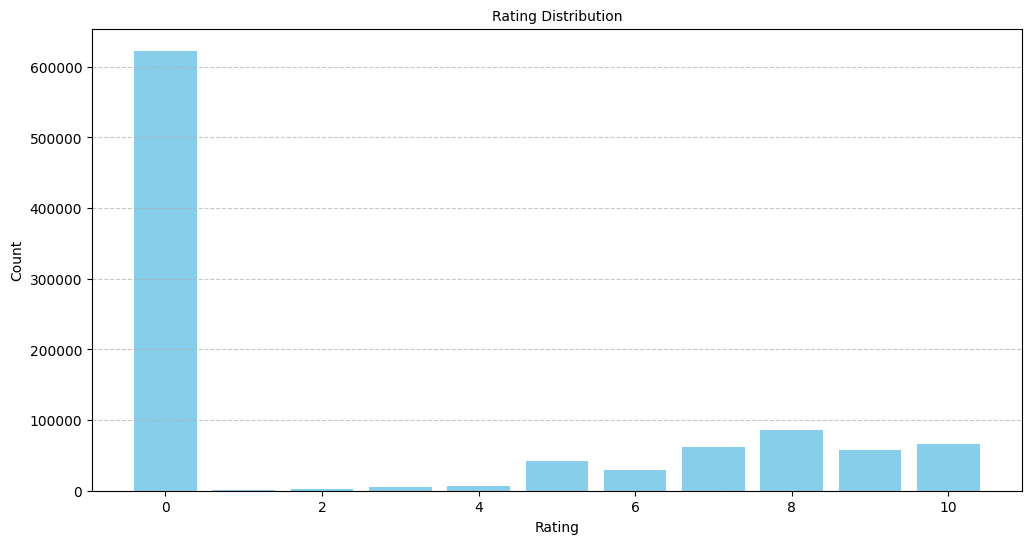

In [ ]:
# Calculate the count of each rating value
rating_counts = df['rating'].value_counts()

# Get rating values as x and their counts as y
ratings = rating_counts.index
count = rating_counts.values

# Create a plot using matplotlib
plt.figure(figsize=(12, 6))
plt.bar(ratings, count, color='skyblue')

# Add title and axis labels
plt.title('Rating Distribution', size=10)
plt.xlabel('Rating', size=10)
plt.ylabel('Count', size=10)

plt.grid(True, axis='y', linestyle='--', alpha=0.7) # Add grid lines with transparency (alpha=0.7)

# Display the plot
plt.show()


From the results of the visualization above, it can be concluded that the most books are books that have a rating of 0. Most likely this book has not been read by many people and is not popular among readers.

This code below will create the visualization for cleaned rating distribution

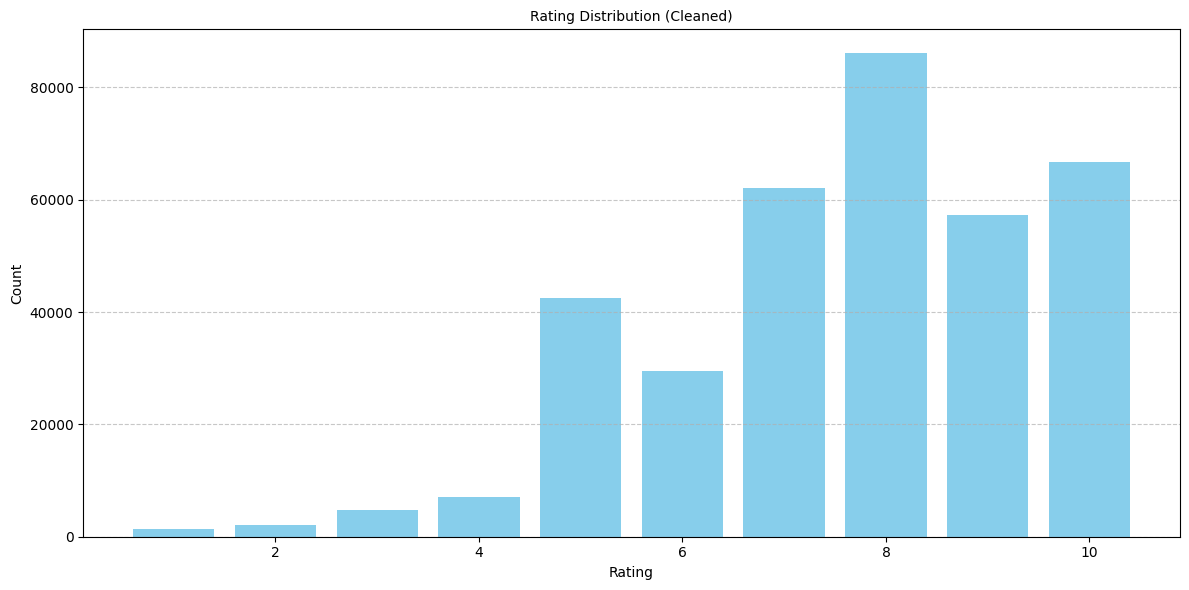

In [ ]:
# Filter out rows where rating is 0
data_rating = df[df['rating'] != 0]

# Count values of 'rating'
rating_counts = data_rating['rating'].value_counts().sort_index()

# Plot using matplotlib
plt.figure(figsize=(12, 6))

# Create bars
plt.bar(rating_counts.index, rating_counts.values, color='skyblue')

plt.title('Rating Distribution (Cleaned)', size=10)
plt.xlabel('Rating', size=10)
plt.ylabel('Count', size=10)

plt.grid(True, axis='y', linestyle='--', alpha=0.7)  # Add grid lines with transparency (alpha=0.7)

plt.tight_layout()
plt.show()

By removing the 0 rating, The most read book is a book with a rating of 8. It is likely that this book is very popular but does not have as high a rating as a book with a rating of 10.

Below is the code that can visualize the top 10 most readed books

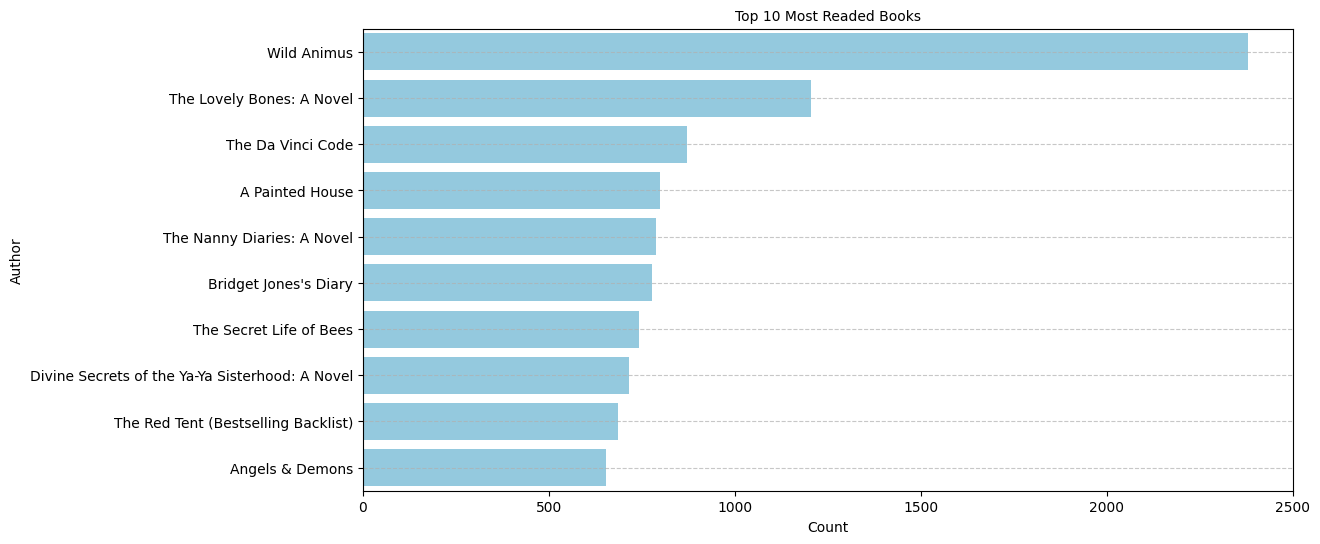

In [ ]:
# Count occurrences of each book and select top 10 most readed books
data_authors = df['book_title'].value_counts().head(10).reset_index()
data_authors.columns = ['book_title', 'count']

# Plotting using seaborn and matplotlib
plt.figure(figsize=(12, 6))
sns.barplot(x='count', y='book_title', data=data_authors, color='skyblue')

# Customizing labels and title
plt.xlabel('Count', size=10)
plt.ylabel('Author', size=10)
plt.title('Top 10 Most Readed Books', size=10)

# Adjusting tick label size for better readability
plt.xticks(size=10)
plt.yticks(size=10)

plt.grid(True, axis='y', linestyle='--', alpha=0.7)  # Add grid lines with transparency (alpha=0.7)

# Displaying the plot
plt.show()

From the visualization above, can be concluded that book with the tile of 'Wild Animus' is the most popular book with more than 2000 readers

Below is the code to show top 10 years of publication

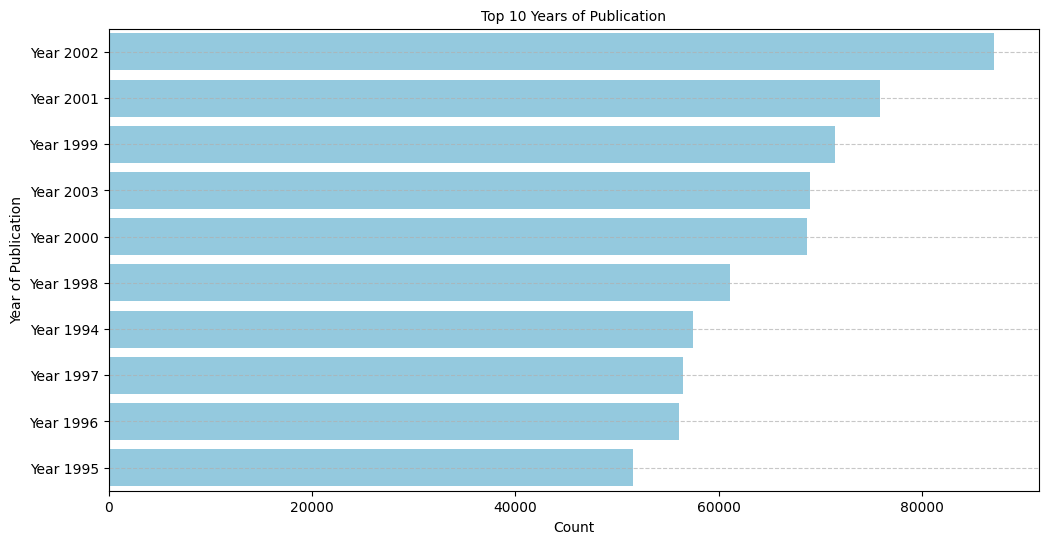

In [ ]:
# Count occurrences of each year and select top 10
data_year = df['year_of_publication'].astype(int).astype(str).value_counts().head(10).reset_index()
data_year.columns = ['year', 'count']
data_year['year'] = 'Year ' + data_year['year']  # Adding 'Year ' prefix for better labeling

# Plotting using seaborn and matplotlib
plt.figure(figsize=(12, 6))
sns.barplot(x='count', y='year', data=data_year, color='skyblue')

# Customizing labels and title
plt.xlabel('Count', size=10)
plt.ylabel('Year of Publication', size=10)
plt.title('Top 10 Years of Publication', size=10)

# Adjusting tick label size for better readability
plt.xticks(size=10)
plt.yticks(size=10)

plt.grid(True, axis='y', linestyle='--', alpha=0.7)  # Add grid lines with transparency (alpha=0.7)

# Displaying the plot
plt.show()

Can concluded, The year when the most books were released was 2002, with more than 80000 books.

This code below with visualize top 10 best-selling author

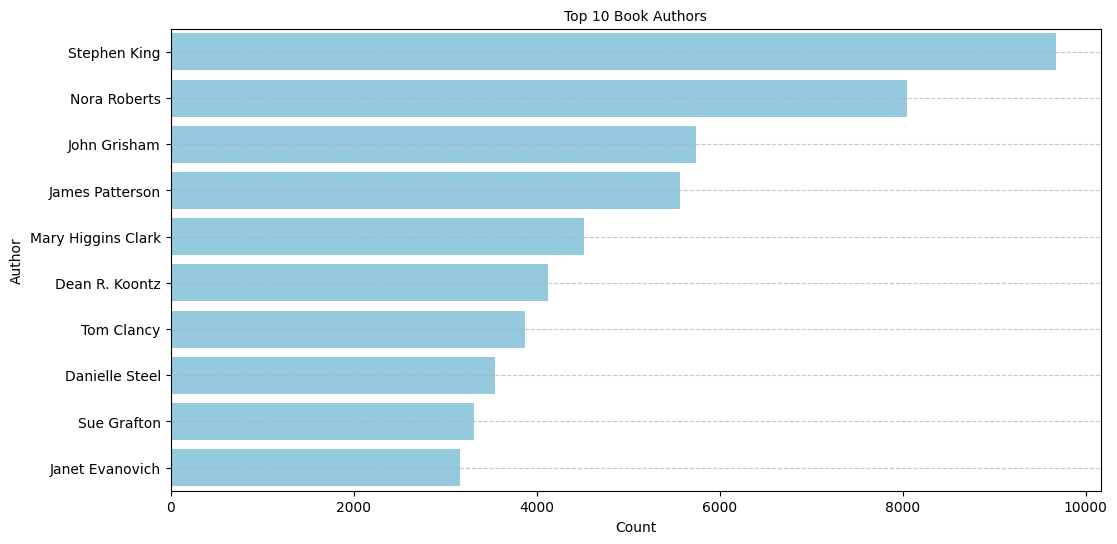

In [ ]:
# Count occurrences of each book author and select top 10
data_authors = df['book_author'].value_counts().head(10).reset_index()
data_authors.columns = ['book_author', 'count']

# Plotting using seaborn and matplotlib
plt.figure(figsize=(12, 6))
sns.barplot(x='count', y='book_author', data=data_authors, color='skyblue')

# Customizing labels and title
plt.xlabel('Count', size=10)
plt.ylabel('Author', size=10)
plt.title('Top 10 Book Authors', size=10)

# Adjusting tick label size for better readability
plt.xticks(size=10)
plt.yticks(size=10)

plt.grid(True, axis='y', linestyle='--', alpha=0.7)  # Add grid lines with transparency (alpha=0.7)

# Displaying the plot
plt.show()

It can be concluded that stephen king is the best-selling author in a certain period. Most likely the book he wrote has the most interesting story among other authors.

Below is the code to visualize the top 10 book publishers.

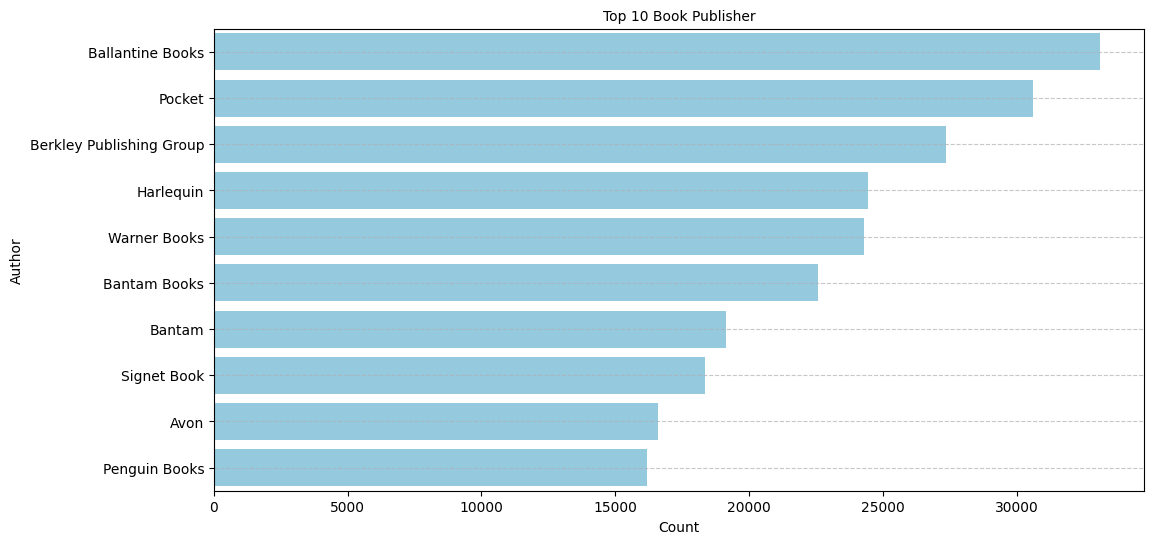

In [ ]:
# Count occurrences of each book publisher and select top 10
data_publisher = df['publisher'].value_counts().head(10).reset_index()
data_publisher.columns = ['publisher', 'count']

# Plotting using seaborn and matplotlib
plt.figure(figsize=(12, 6))
sns.barplot(x='count', y='publisher', data=data_publisher, color='skyblue')

# Customizing labels and title
plt.xlabel('Count', size=10)
plt.ylabel('Author', size=10)
plt.title('Top 10 Book Publisher', size=10)

# Adjusting tick label size for better readability
plt.xticks(size=10)
plt.yticks(size=10)

plt.grid(True, axis='y', linestyle='--', alpha=0.7)  # Add grid lines with transparency (alpha=0.7)

# Displaying the plot
plt.show()

It can be concluded that Ballentine Books was the largest publisher of books in its time, meaning that this publisher had a major contribution to the book industry in its time.

## Data Preparation

The following is a dataset that has gone through the data cleaning stage

In [ ]:
df.head(len(df))

,location,age,isbn,rating,book_title,book_author,year_of_publication,publisher,Summary,Language,Category,city,state,country
0,"stockton, california, usa",18.0000,0195153448,0,Classical Mythology,Mark P. O. Morford,2002.0,Oxford University Press,Provides an introduction to classical myths pl...,en,['Social Science'],stockton,california,usa
1,"timmins, ontario, canada",34.7439,0002005018,5,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,"In a small town in Canada, Clara Callan reluct...",en,['Actresses'],timmins,ontario,canada
2,"ottawa, ontario, canada",49.0000,0002005018,0,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,"In a small town in Canada, Clara Callan reluct...",en,['Actresses'],ottawa,ontario,canada
4,"sudbury, ontario, canada",34.7439,0002005018,0,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,"In a small town in Canada, Clara Callan reluct...",en,['Actresses'],sudbury,ontario,canada
5,"toronto, ontario, canada",30.0000,0002005018,8,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,"In a small town in Canada, Clara Callan reluct...",en,['Actresses'],toronto,ontario,canada
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1031170,"dallas, texas, usa",33.0000,0743203763,0,As Hogan Said . . . : The 389 Best Things Anyo...,Randy Voorhees,2000.0,Simon & Schuster,Golf lovers will revel in this collection of t...,en,['Humor'],dallas,texas,usa
1031171,"dallas, texas, usa",33.0000,0767907566,5,All Elevations Unknown: An Adventure in the He...,Sam Lightner,2001.0,Broadway Books,A daring twist on the travel-adventure genre t...,en,['Nature'],dallas,texas,usa
1031172,"dallas, texas, usa",33.0000,0884159221,7,Why stop?: A guide to Texas historical roadsid...,Claude Dooley,1985.0,Lone Star Books,9,9,9,dallas,texas,usa
1031173,"dallas, texas, usa",33.0000,0912333022,7,The Are You Being Served? Stories: 'Camping In...,Jeremy Lloyd,1997.0,Kqed Books,These hilarious stories by the creator of publ...,en,['Fiction'],dallas,texas,usa


### Removing Unnecessary Features
Discarding some unused feature columns

In [ ]:
# Drop unnecessary columns and duplicates
cleaned_df = df.drop(columns=['location', 'age', 'year_of_publication', 'publisher', 'Language', 'city', 'state', 'country'])
cleaned_df = cleaned_df.drop_duplicates(subset=['book_title'])

### Reduce Categories

Filtering categories that have less than 50 and more than 2000 books to save computation time.

In [ ]:
# Calculate category counts
category_counts = cleaned_df['Category'].value_counts()

# Filter categories based on count for shorten computing time
unused_cat = category_counts[(category_counts < 50) | (category_counts > 2000)].index.tolist()

Removes books that have a rating of 0 in the dataset.

In [ ]:
dfbooks = cleaned_df.loc[~cleaned_df['Category'].isin(unused_cat)]
dfbooks = dfbooks[dfbooks['rating'] != 0]
dfbooks.head(len(dfbooks))

,isbn,rating,book_title,book_author,Summary,Category
92,1575663937,6,More Cunning Than Man: A Social History of Rat...,Robert Hendrickson,"This eye-opening, well-researched examination ...",['Nature']
756,1879384493,10,If I'd Known Then What I Know Now: Why Not Lea...,J. R. Parrish,Provides advice on ways to succeed in business...,['Reference']
7448,1558531025,5,Life's Little Instruction Book (Life's Little ...,H. Jackson Brown,A collection of advice on how to live a happy ...,['Conduct of life']
7735,0375509038,8,The Right Man : The Surprise Presidency of Geo...,DAVID FRUM,An account of the first year of George W. Bush...,['Political Science']
7737,0553062042,7,Daybreakers Louis Lamour Collection,Louis Lamour,Tyrel and Orrin Sackett travel from Tennessee ...,['Brothers']
...,...,...,...,...,...,...
1031121,1571741097,6,"Remote Perceptions: Out-Of-Body Experiences, R...",Angela Thompson Smith,"InRemote Perceptions, she explores past, remot...","['Body, Mind & Spirit']"
1031124,1576734218,5,On Becoming Childwise,Gary Ezzo,On Becoming Childwise responds to this need by...,['Family & Relationships']
1031126,0028630343,7,"Frommer's 2000 Bahamas (Frommer's Bahamas, 2000)",Arthur Frommer,Life is short. Vacations are shorter. Relax! T...,['Travel']
1031137,0393045900,9,Inner Hunger: A Young Woman's Struggle Through...,Marianne Apostolides,"The author provides a dramatic, detailed accou...",['Self-Help']


### Clean up the Category Feature

This code below will clean the categories feature by removing the symbols and special characters.

In [ ]:
def clean_category(text):
    # Remove square brackets, single/double quotes, and periods
    text = re.sub(r'[\[\]\'"\.]', '', text)
    return text.strip()  # Strip whitespace from both ends of the cleaned text

# Apply the clean_category function to the 'Category' column
dfbooks['category'] = dfbooks['Category'].apply(clean_category)

# Sort unique categories alphabetically
clean_cat_sort = np.sort(dfbooks['category'].unique())

# Print sorted categories
for cat in clean_cat_sort:
    print(cat)

Actors
Adolescence
Adventure and adventurers
Adventure stories
African Americans
American fiction
American literature
American poetry
Animals
Antiques & Collectibles
Architecture
Art
Australia
Authors, American
Babysitters
Bears
Bible
Body, Mind & Spirit
Brothers
Brothers and sisters
Business & Economics
Canada
Cats
Children
Childrens stories
Childrens stories, American
Childrens stories, English
Christian fiction
Christian life
Christmas stories
Comics & Graphic Novels
Computers
Conduct of life
Cooking
Crafts & Hobbies
Design
Detective and mystery stories
Dinosaurs
Dogs
Domestic fiction
Drama
Education
England
English fiction
English language
Fairy tales
Families
Family & Relationships
Fantasy
Fantasy fiction
Foreign Language Study
France
French fiction
Friendship
Games
Games & Activities
Gardening
German fiction
Great Britain
Health & Fitness
Horror stories
Horror tales
House & Home
Humor
Indians of North America
Language Arts & Disciplines
Law
Literary Collections
Literary Criticism

Drop the 'Category' column

In [ ]:
clean_data = dfbooks.drop(['Category'], axis=1)
clean_data.head()

,isbn,rating,book_title,book_author,Summary,category
92,1575663937,6,More Cunning Than Man: A Social History of Rat...,Robert Hendrickson,"This eye-opening, well-researched examination ...",Nature
756,1879384493,10,If I'd Known Then What I Know Now: Why Not Lea...,J. R. Parrish,Provides advice on ways to succeed in business...,Reference
7448,1558531025,5,Life's Little Instruction Book (Life's Little ...,H. Jackson Brown,A collection of advice on how to live a happy ...,Conduct of life
7735,0375509038,8,The Right Man : The Surprise Presidency of Geo...,DAVID FRUM,An account of the first year of George W. Bush...,Political Science
7737,0553062042,7,Daybreakers Louis Lamour Collection,Louis Lamour,Tyrel and Orrin Sackett travel from Tennessee ...,Brothers


In [ ]:
clean_data.shape

(15794, 6)

## Modeling

## Content Based Filtering

### TF-IDF Vectorizer

Used `Tfidfvectorizer` to perform _idf_ calculation on `clean_category` and perform array mapping.

In [ ]:
# Initialize TfidfVectorizer
tf = TfidfVectorizer()
tf.fit(clean_data['category'])
tf.get_feature_names_out()

array(['activities', 'actors', 'adolescence', 'adventure', 'adventurers',
       'african', 'aids', 'america', 'american', 'americans', 'and',
       'animals', 'antiques', 'architecture', 'art', 'arts', 'australia',
       'authors', 'babysitters', 'bears', 'bible', 'body', 'britain',
       'brothers', 'business', 'canada', 'cats', 'children', 'childrens',
       'christian', 'christmas', 'collectibles', 'collections', 'comics',
       'computers', 'conduct', 'cooking', 'crafts', 'crime', 'criticism',
       'design', 'detective', 'dinosaurs', 'disciplines', 'dogs',
       'domestic', 'drama', 'economics', 'education', 'engineering',
       'england', 'english', 'fairy', 'families', 'family', 'fantasy',
       'fiction', 'fitness', 'foreign', 'france', 'french', 'friendship',
       'games', 'gardening', 'german', 'graphic', 'great', 'health',
       'help', 'hobbies', 'home', 'horror', 'house', 'humor', 'indians',
       'language', 'law', 'life', 'literary', 'literature', 'man',
  

In [ ]:
# Fit and transform 'clean_category' to TF-IDF matrix
tfidf_matrix = tf.fit_transform(clean_data['category'])
tfidf_matrix.shape

(15794, 117)

The result of the previously created matrix can be seen with `todense()`

In [ ]:
tfidf_matrix.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
show_books_category = pd.DataFrame(
    tfidf_matrix.todense(), 
    columns=tf.get_feature_names_out(),
    index=clean_data.book_title
).sample(20, axis=1).sample(10, axis=0)

show_books_category

,science,drama,poetry,australia,relationships,games,self,babysitters,photography,house,medical,crime,novels,adolescence,crafts,bears,dogs,performing,study,art
book_title,,,,,,,,,,,,,,,,,,,,
In and Out of the Garden,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
Newcomb's Wildflower Guide,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
Birder's Handbook : A Field Guide to the Natural Histroy of North American Birds,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
Traffic: The Shooting Script (Newmarket Shooting Script Series),0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.753077,0.0,0.0
What's The Verdict?: You're the Judge in 90 Tricky Courtroom Quizzes,0.0,0.0,0.0,0.0,0.0,0.665706,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
Eerdmans Handbook to the Bible,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
Understanding the Present: Alternative History of Science,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
Birdtalk: Conversations with Birds,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
"ZOIDS: Chaotic Century, Vol. 3",0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.57735,0.0,0.0,0.0,0.0,0.000000,0.0,0.0


### Cosine Similarity

In [ ]:
# Calculate cosine similarity
cosine_sim = cosine_similarity(tfidf_matrix)

# Create DataFrame with cosine similarity matrix
cosine_sim_df = pd.DataFrame(cosine_sim, index=clean_data['book_title'], columns=clean_data['book_title'])
print(f"Shape: {cosine_sim_df.shape}") 

# Display a sample subset of the similarity matrix
sample_titles = cosine_sim_df.sample(5, axis=1).sample(10, axis=0)  # Sample 5 columns and 10 rows
sample_titles

Shape: (15794, 15794)


book_title,Top Secret Recipes Lite!: Creating Reduced-Fat Kitchen Clones of America's Favorite Brand-Name Foods,"Preacher: Proud Americans (Preacher Library , Vol 3)",1001 Ways to Reward Employees,The 17 Indisputable Laws of Teamwork: Embrace Them and Empower Your Team,The Road to Serfdom
book_title,,,,,
Spanish A La Cartoon,0.0,0.0,0.0,0.0,0.0
The Baby Games: The Joyful Guide to Child's Play from Birth to Three Years,0.0,0.0,0.0,0.0,0.0
"Dressing With Color: The Designer's Guide to over 1,000 Color Combinations",0.0,0.0,0.0,0.0,0.0
Why We Love Dogs: A Bark & Smile Book,0.0,0.0,0.0,0.0,0.0
Estelle Thompson,0.0,1.0,0.0,0.0,0.0
The Great American Seafood Cookbook,1.0,0.0,0.0,0.0,0.0
Aprender En La Vida y En La Escuela (Literatura y Sociedad),0.0,0.0,0.0,0.0,0.0
The Illustrated Veterinary Guide,0.0,0.0,0.0,0.0,0.0
"Eastward to Tartary: Travels in the Balkans, the Middle East, and the Caucasus (Vintage Departures)",0.0,0.0,0.0,0.0,0.0


## Recommendation Testing

In [ ]:
def book_recommendations(books, similarity_data=cosine_sim_df, items=clean_data[['book_title', 'rating', 'book_author', 'category']], k=10):
    # Convert the similarity data to a numpy array
    similarity_array = similarity_data.loc[:, books].to_numpy()

    # Get the indices of the k most similar books
    index = similarity_array.argpartition(range(-1, -k, -1))
    
    # Get the book titles and their corresponding similarity scores
    closest_indices = index[-1:-(k+2):-1]
    closest_books = similarity_data.columns[closest_indices]
    closest_scores = similarity_array[closest_indices]

    # Create a DataFrame with the closest books and their similarity scores
    recommendations = pd.DataFrame({
        'book_title': closest_books,
        'similarity_score': closest_scores
    })

    # Drop the queried book from the recommendations
    recommendations = recommendations[recommendations['book_title'] != books]
    # Merge with the items DataFrame to get additional information
    recommendations = recommendations.merge(items, on='book_title').head(k)
    
    return recommendations

In [ ]:
book = "Why We Love Dogs: A Bark & Smile Book"
clean_data[clean_data.book_title.eq(book)]

,isbn,rating,book_title,book_author,Summary,category
772212,0836269713,6,Why We Love Dogs: A Bark & Smile Book,Kim Levin,This endearing gift book celebrates the unique...,Pets


## Top 10 Books

In [ ]:
book_recommendations(book)

,book_title,similarity_score,rating,book_author,category
0,Pug Shots,1.0,10,Jim Dratfield,Pets
1,Dog Perfect: The User-Friendly Guide to a Well...,1.0,9,Sarah Hodgson,Pets
2,Aspca Complete Cat Care Manual,1.0,10,Andrew Edney,Pets
3,Cosmic Canines : The Complete Astrology Guide ...,1.0,8,MARILYN MACGRUDER BARNEWALL,Pets
4,A Step-By-Step Book About Gerbils,1.0,10,Patrick Bradley,Pets
5,The Evans Guide for Housetraining Your Dog,1.0,9,Job Michael Evans,Pets
6,The New Parrot Handbook: Everything About Purc...,1.0,8,Werner Lantermann,Pets
7,Beyond Basic Dog Training,1.0,7,Diane L. Bauman,Pets
8,The Trick Is in the Training: 25 Fun Tricks to...,1.0,9,Stephanie J. Taunton,Pets
9,The Essential Beagle (Essential (Howell)),1.0,9,Howell Book House,Pets
